## If you are happy with all the fitting parameters, please use the the fitting script directly.

In [22]:
%matplotlib inline

## step1: create a pygsfit_cp object with EOVSA image cube and the path to save the fitting results files.

In [23]:
#init_script
from pygsfit_cp import *
import os
import pkg_resources
package_path = pkg_resources.resource_filename('pygsfit_cp', '')
gs = pygsfit_cp(out_dir='/Users/walterwei/Downloads/20220511/gsfit_test/test_0918/') #filename by default is ./demo/eovsa_allbd_demo_0.fits
print('The EOVSA image cube is loaded, which is in size of {0}(freqs) * {1}pix * {2}pix'.format(*gs.flux_data.shape))

The EOVSA image cube is loaded, which is in size of 50(freqs) * 256pix * 256pix


## step2 （Optional）: 
### read the documentation of input arrays then adjust the input arrays

In [3]:
#skip tag
#read the documentation of 'ninput', 'rinput', and 'initial_parguess' (Only these 3 files at this moment)
gs.documentation('ninput')
gs.documentation('rinput')
gs.documentation('initial_parguess')

       Nparms;           7              ; ;user ;Number of fit Parms
 Angular Code;           0             ; ;user ;0L for PK, 1L for FK
         Npix;           1     ; ;data ;Number of pixels sent to dll
        Nfreqst;          24  ; ;data ;Number of frequencies in the sp
 Fitting Mode;           1  ; ;user ;Case of the fit: I:1, L&R:2, I&
  Stokes Data;           1  ; ;data ;Case of the data: I:1, L&R:2, I

   SIMPLEX Step;   0.170       ;   ;user                           ;SIMPLEX Step
    SIMPLEX EPS;   0.100E-05   ;   ;user                       ;SIMPLEX accuracy
 Flux Threshold;    1.00        ;sfu*GHz     ; user ;Flux threshold to be fitted
     Pixel Area;    4.00       ;arcsec^2    ;data ;Number of pixels along y axes
      LOS Depth;    8.00        ;arcsec               ;user ;LOS depth (assumed)
           ;   0.150E-01  ;MeV ;user            ;Min energy in PLW (assumed)

      n_nth;    1.00    ;   0.100E-03;   0.200E+04;   1d7 cm^-3                    ;Non-thermal dens

### adjust the input arrays as needed. Also set the demanded threshold in sfu for masking 

In [4]:
#to_script tag
gs.ninput = np.array([6, 0, 1, 30, 1, 1], dtype='int32') #Nparms, Angular_mode,Npix, Nfreq(will be replaced) fitting mode, stokes
gs.rinput = np.array([0.17, 1e-6, 1.0, 4.0, 8.0, 0.015], dtype='float64')  # real_input
gs.initial_parguess = np.array([ # *Value, *lower boundary * upper boundary
                [10.0, 0.0001, 2000.0], #n_nth;    1d7 cm^-3
                [1.0, 0.01, 10.0], #B;    1d2G
                [60.0, 22.0, 87.0], #theta;    deg
                [10.0, 0.01, 600.0], #n_th;    1d9 cm^-3
                [3.5, 1.6, 10.0], #Delta;    No
                [5.0, 0.1, 10.0], #E_max;    MeV
                [10.0, 1.5, 60.0], #T_e;    MK
            ], dtype=np.float64)
#gs.update_flux_threshold_mask(threshold=8.0) #summed flux density > 8sfu for current pixel

### check the fitting mask and rms region

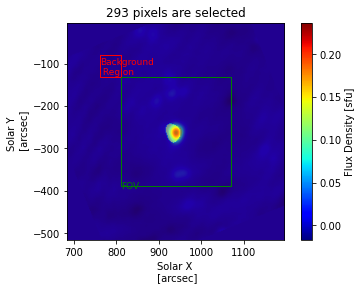

In [24]:
gs.plot_threshold_mask_rms(tar_freq_ghz=5.0) # tar_freq_ghz: Displayed frequency in GHz

## Step 3: 
### Adjust the ROI(region of interested) and the related parameters
### Display the default setting: 
- background_xyrange = [[0.15,0.75],[0.25,0.85]] (RMS region in percentage of x and y range)
- integrated_threshold_sfu = 1 (Threshold on the integrated flux density in one pixel)
- rms_factor = 4 (The weight of RMS in the uncertainty calculation)
### The final mask would be FOV intersected with the flux density threshold mask.

In [25]:
# change the fov
gs.fit_fov = [[880,-360],[1000,-210]]

In [27]:
#to_script tag
gs.rms_factor = 4
gs.update_rms()
gs.integrated_threshold_sfu = 1.0
gs.update_flux_threshold_mask()
gs.background_xyrange = [[0.45,0.75],[0.55,0.85]] #

### check the fitting mask and rms region

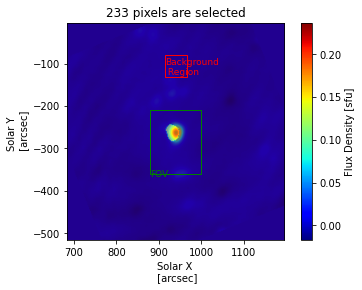

In [28]:
gs.plot_threshold_mask_rms(tar_freq_ghz=5.0) # tar_freq_ghz: Displayed frequency in GHz

## step 4: 
### Do fitting! There are 2 options:
- single pixel mode
- batch mode (single or multiple frames)

### Single Pixel Mode: you can provide the coord of interest in Solar XY or Pixel

In [29]:
#to_script tag
gs.start_freq = 4.e9
gs.end_freq = 14.e9

Current fitting range is 4000000000.0 - 14000000000.0 Hz
Long inputs are:  [ 6  0  1 32  1  1]
Real inputs are:  [1.7e-01 1.0e-06 1.0e+00 4.0e+00 8.0e+00 1.5e-02]
Params(ranges) are:  [[1.0e+01 1.0e-04 2.0e+03]
 [1.0e+00 1.0e-02 1.0e+01]
 [6.0e+01 2.2e+01 8.7e+01]
 [1.0e+01 1.0e-02 6.0e+02]
 [3.5e+00 1.6e+00 1.0e+01]
 [5.0e+00 1.0e-01 1.0e+01]
 [1.0e+01 1.5e+00 6.0e+01]]
1 pixels to be fitted
will be fitted in batch mode


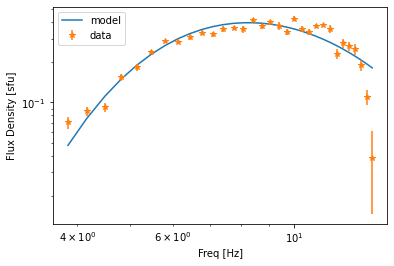

1

In [18]:

#gs.do_fit(mode='single', inp_coord=[9,-261])
gs.do_fit(mode='single', inp_coord=[933, -260], world=True)#inp_coord is always in x(122),y(152) order. 

### batch Mode: create multiple tasks(all the unmasked pixels), the results will be saved in a pickle file. And will be combine to a hdf5 file later

## Export fitting scripts 
### If you are happy with the current results and want to fit a time series (or single frame) with the same parameters used here, please modify the information in the cell starts with
## '#init multiple' tag
### in the Appendix. 
## FOV must be provided at this step!
### Then, run the FOLLOWING cell to export a fitting script:

In [30]:
#!!!!please modify the information in the cell starting with the '#init multiple' tag.
notebook_path = os.path.join(os.getcwd(), 'Tut.ipynb') #MAKE SURE the file name is correct
mt_pyfile_path = os.path.join(gs.out_dir, 'exported_notebook_cells.py') #replace with your own path
gs.save_notebook_cells(notebook_path, mt_pyfile_path)

/Users/walterwei/Downloads/20220511/gsfit_test/test_0918/exported_notebook_cells.py is saved.


## Step 5 Examing fitting and the parameter maps in gsfitview (in sswidl)
### By running the python script created by the cell above, you'll got:
* An IDL script: make_params_maps.pro
* A .h5 file which contains all the fitting results: fitting_results.h5
### in your output dir.
### Then, run the IDL script: make_params_maps.pro in IDL without any modification, you'll get a save file: parameters_map.sav (or you own filename if you modified the .pro file), which can be loaded in the gsfitview.

## Step6: Complain to [Yuqian](yw633@njit.edu) that this crappy code doesn't work at all.

# Appendix: 
## The following cells are used to create a new scipt, please DO NOT run it in the notebook directly. 
### mapcubes_dir: the inpuy can be a folder, a fits file, or a mainstream zip file (.zip, .tar, .tar.gz, .tar.bz2 files)

In [ ]:
#init multiple
package_path = pkg_resources.resource_filename('pygsfit_cp', '')
out_dir='/Users/walterwei/Downloads/20220511/gsfit_test/test_0918/'
#out_dir = None # will use default: ~/pygsfit_cp_output
inp_fov = [[880,-340],[1000,-210]] #please use the value you tested in the previous cells
mapcubes_dir = package_path+'/demo/' # Replace with your own data folder or fits file or .zip, .tar, .tar.gz, .tar.bz2 files
eovsa_map_cubes = process_input_path(mapcubes_dir)
if not eovsa_map_cubes:
    print("The input list is empty. Please check your mapcubes_dir.")
    sys.exit(1)  # Exit with a non-zero status to indicate an error
cur_fixed_mask = get_fixed_fov_mask(eovsa_map_cubes[0],inp_fov)
map_files_by_frame = []
fitting_files_by_frame = []
for emi, ceomap in enumerate(eovsa_map_cubes):
    gs = pygsfit_cp(filename=ceomap, out_dir=out_dir)
    gs.pix_mask = cur_fixed_mask

In [ ]:
cur_fixed_mask = create_fov_mask(self.meta['refmap'], self.fit_fov))
gs.

## Data structure for each task is: 
Group: task_0001
    ├── Dataset: task_0001/aparms
    ├── Dataset: task_0001/eparms
    ├── Group: task_0001/info
    │   ├── Dataset: task_0001/info/coord
    │   ├── Dataset: task_0001/info/data_saved_range
    │   ├── Dataset: task_0001/info/end_freq_idx
    │   ├── Dataset: task_0001/info/filename
    │   ├── Dataset: task_0001/info/freq_fitted
    │   ├── Dataset: task_0001/info/ninput
    │   ├── Dataset: task_0001/info/out_dir
    │   ├── Dataset: task_0001/info/parguess
    │   ├── Dataset: task_0001/info/rinput
    │   ├── Dataset: task_0001/info/rms_range
    │   ├── Dataset: task_0001/info/spec_in
    │   ├── Dataset: task_0001/info/start_freq_idx
    │   ├── Dataset: task_0001/info/task_idx
    │   └── Dataset: task_0001/info/world_center
    ├── Dataset: task_0001/spec_out

In [16]:
#to_script tag
#gs.update_flux_threshold_mask()
cur_save_file = gs.do_fit(mode='batch')

Current fitting range is 3000000000.0 - 14000000000.0 Hz
Long inputs are:  [ 6  0  1 35  1  1]
Real inputs are:  [1.7e-01 1.0e-06 1.0e+00 4.0e+00 8.0e+00 1.5e-02]
Params(ranges) are:  [[1.0e+01 1.0e-04 2.0e+03]
 [1.0e+00 1.0e-02 1.0e+01]
 [6.0e+01 2.2e+01 8.7e+01]
 [1.0e+01 1.0e-02 6.0e+02]
 [3.5e+00 1.6e+00 1.0e+01]
 [5.0e+00 1.0e-01 1.0e+01]
 [1.0e+01 1.5e+00 6.0e+01]]
68 pixels to be fitted
will be fitted in batch mode
